In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import anndata as ad

In [4]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.7.0
jupyterlab_server   2.5.1
kiwiso

In [5]:
samples = ['Mock-Ileum-D1PI', 'T1L-Ileum-D1PI', 'Mock-Ileum-D4PI', 'T1L-Ileum-D4PI']

In [16]:
stage_data_visium = list()

for sample in samples:
    print(sample)
    data_visium = sc.read_visium(path="./../spatialData/" + sample + "/outs/")
    data_visium.var_names_make_unique()
    print(data_visium)
    
    reoviral_genes = [name for name in data_visium.var_names if name.startswith('Reo')]
    print(reoviral_genes)
    viral_expression = data_visium[:,reoviral_genes].to_df()
    viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
    reoviral_genes_indicator = np.in1d(data_visium.var_names, reoviral_genes)
    data_visium_no_viral_genes = data_visium[:, ~reoviral_genes_indicator]
    data_visium_no_viral_genes.var_names = [name.split("_")[1] for name in data_visium_no_viral_genes.var_names]
    data_visium_no_viral_genes.obs.join(viral_expression.astype(int))
    print(data_visium_no_viral_genes.shape)

    data_visium_no_viral_genes.obs_names_make_unique()
    data_visium_no_viral_genes.var_names_make_unique()

    sc.pp.filter_cells(data_visium_no_viral_genes, min_counts=1)
    sc.pp.filter_genes(data_visium_no_viral_genes, min_cells=1)

    data_visium_no_viral_genes.var['mt'] = data_visium_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(data_visium_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

    sc.pp.normalize_total(data_visium_no_viral_genes, inplace=True)
    sc.pp.log1p(data_visium_no_viral_genes)

    data_visium_no_viral_genes.raw = data_visium_no_viral_genes
    
    sc.pp.scale(data_visium_no_viral_genes, max_value=10)
    sc.pp.pca(data_visium_no_viral_genes)
    sc.pp.neighbors(data_visium_no_viral_genes, n_pcs=20)
    sc.tl.umap(data_visium_no_viral_genes)
    sc.tl.leiden(data_visium_no_viral_genes, key_added="leiden_0.5", resolution = 0.5)
    sc.tl.leiden(data_visium_no_viral_genes, key_added="leiden_0.8", resolution = 0.8)
    sc.tl.leiden(data_visium_no_viral_genes, key_added="leiden_1.0", resolution = 1.0)
    data_visium_no_viral_genes.obs["sample"] = sample
    
    stage_data_visium.append(data_visium_no_viral_genes)

reading ../spatialData/Mock-Ileum-D1PI/outs/filtered_feature_bc_matrix.h5


Mock-Ileum-D1PI


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1970 × 54848
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(1970, 54838)


filtered out 34593 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
r

T1L-Ileum-D1PI


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1744 × 54848
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(1744, 54838)


filtered out 33996 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:09)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)

Mock-Ileum-D4PI


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 2152 × 54848
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(2152, 54838)


filtered out 34922 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)

T1L-Ileum-D4PI


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 2161 × 54848
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(2161, 54838)


filtered out 34462 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:12)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)

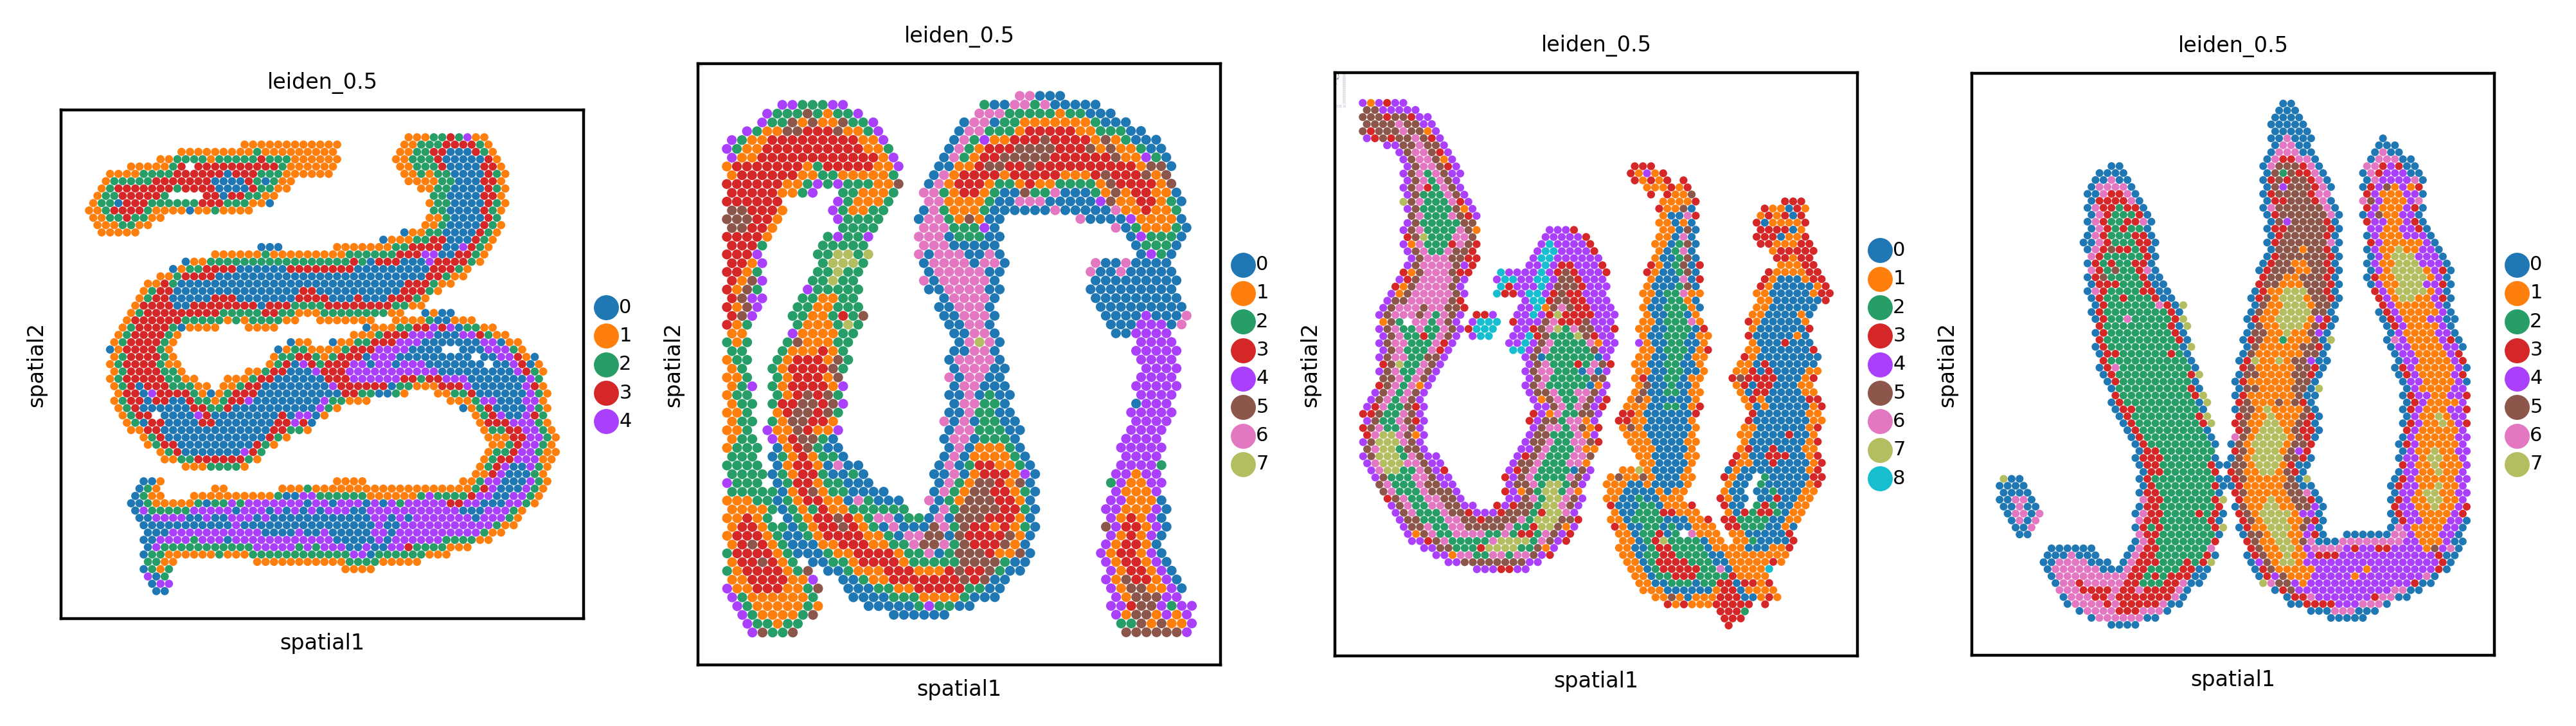

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for i, library in enumerate(stage_data_visium):
    ad = library.copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=samples[i],
        color="leiden_0.5",
        size=1.5,
        scale_factor=1.0,
        show=False,
        ax=axs[i],
    )
plt.tight_layout()

In [20]:
stage_data_visium[0].write_h5ad(filename="./../pyobjs/Mock_ileum_D1PI.h5ad")
stage_data_visium[1].write_h5ad(filename="./../pyobjs/T1L_ileum_D1PI.h5ad")
stage_data_visium[2].write_h5ad(filename="./../pyobjs/Mock_ileum_D4PI.h5ad")
stage_data_visium[3].write_h5ad(filename="./../pyobjs/T1L_ileum_D4PI.h5ad")

... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [53]:
stage_data_visium[0].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[0].obs["leiden_0.5"]
anatomical_regions = {'0': "Lumen", 
             '1': "Muscularis and \n serosa", 
             '2': "Submucosa", 
             '3': "Mucosa and \n villi",
             '4': "Mucosa and \n villi"}
stage_data_visium[0].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[0].obs["anatomical_regions_leiden_0.5"].map(anatomical_regions).astype("category")
stage_data_visium[1].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[1].obs["leiden_0.5"]
anatomical_regions = {'0': "Inflamed muscularis and \n serosa", 
             '1': "Inflamed mucosa and \n villi", 
             '2': "Inflamed submucosa", 
             '3': "Inflamed mucosa and \n villi",
              '4': "Inflamed muscularis and \n serosa",
              '5': "Lumen",
              '6': "Inflamed muscularis and \n serosa",
              '7':"Inflamed muscularis and \n serosa"}
stage_data_visium[1].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[1].obs["anatomical_regions_leiden_0.5"].map(anatomical_regions).astype("category")
stage_data_visium[2].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[2].obs["leiden_0.5"]
anatomical_regions = {'0': "Mucosa and \n villi", 
             '1': "Muscularis and \n serosa", 
             '2': "Mucosa and \n villi", 
             '3': "Lumen",
              '4': "Muscularis and \n serosa", 
             '5': "Submucosa",
             '6': "Mucosa and \n villi",
               '7':  "Lumen",
               '8': "Lumen"}
stage_data_visium[2].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[2].obs["anatomical_regions_leiden_0.5"].map(anatomical_regions).astype("category")
stage_data_visium[3].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[3].obs["leiden_0.5"]
anatomical_regions = {'0': "Inflamed muscularis and \n serosa", 
             '1': "Inflamed mucosa and \n villi", 
             '2': "Inflamed mucosa and \n villi", 
             '3': "Inflamed submucosa",
             '4': "Inflamed mucosa and \n villi",
             '5': "Inflamed submucosa",
            '6': "Inflamed submucosa",
             '7': "Lumen"
            }
stage_data_visium[3].obs["anatomical_regions_leiden_0.5"] = stage_data_visium[3].obs["anatomical_regions_leiden_0.5"].map(anatomical_regions).astype("category")

In [54]:
ileum_infection_visium_no_viral_genes = stage_data_visium[0].concatenate(
    stage_data_visium[1], stage_data_visium[2], stage_data_visium[3],
    batch_key="sample", 
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            stage_data_visium[0].uns["spatial"],
            stage_data_visium[1].uns["spatial"],
            stage_data_visium[2].uns["spatial"],
            stage_data_visium[3].uns["spatial"],
        ]
        for k, v in d.items()
    ],
)

In [55]:
ileum_infection_visium_no_viral_genes.obs["anatomical_regions_leiden_0.5"] = ileum_infection_visium_no_viral_genes.obs["anatomical_regions_leiden_0.5"].astype("category")

... storing 'leiden_0.5' as categorical
... storing 'leiden_0.8' as categorical
... storing 'leiden_1.0' as categorical


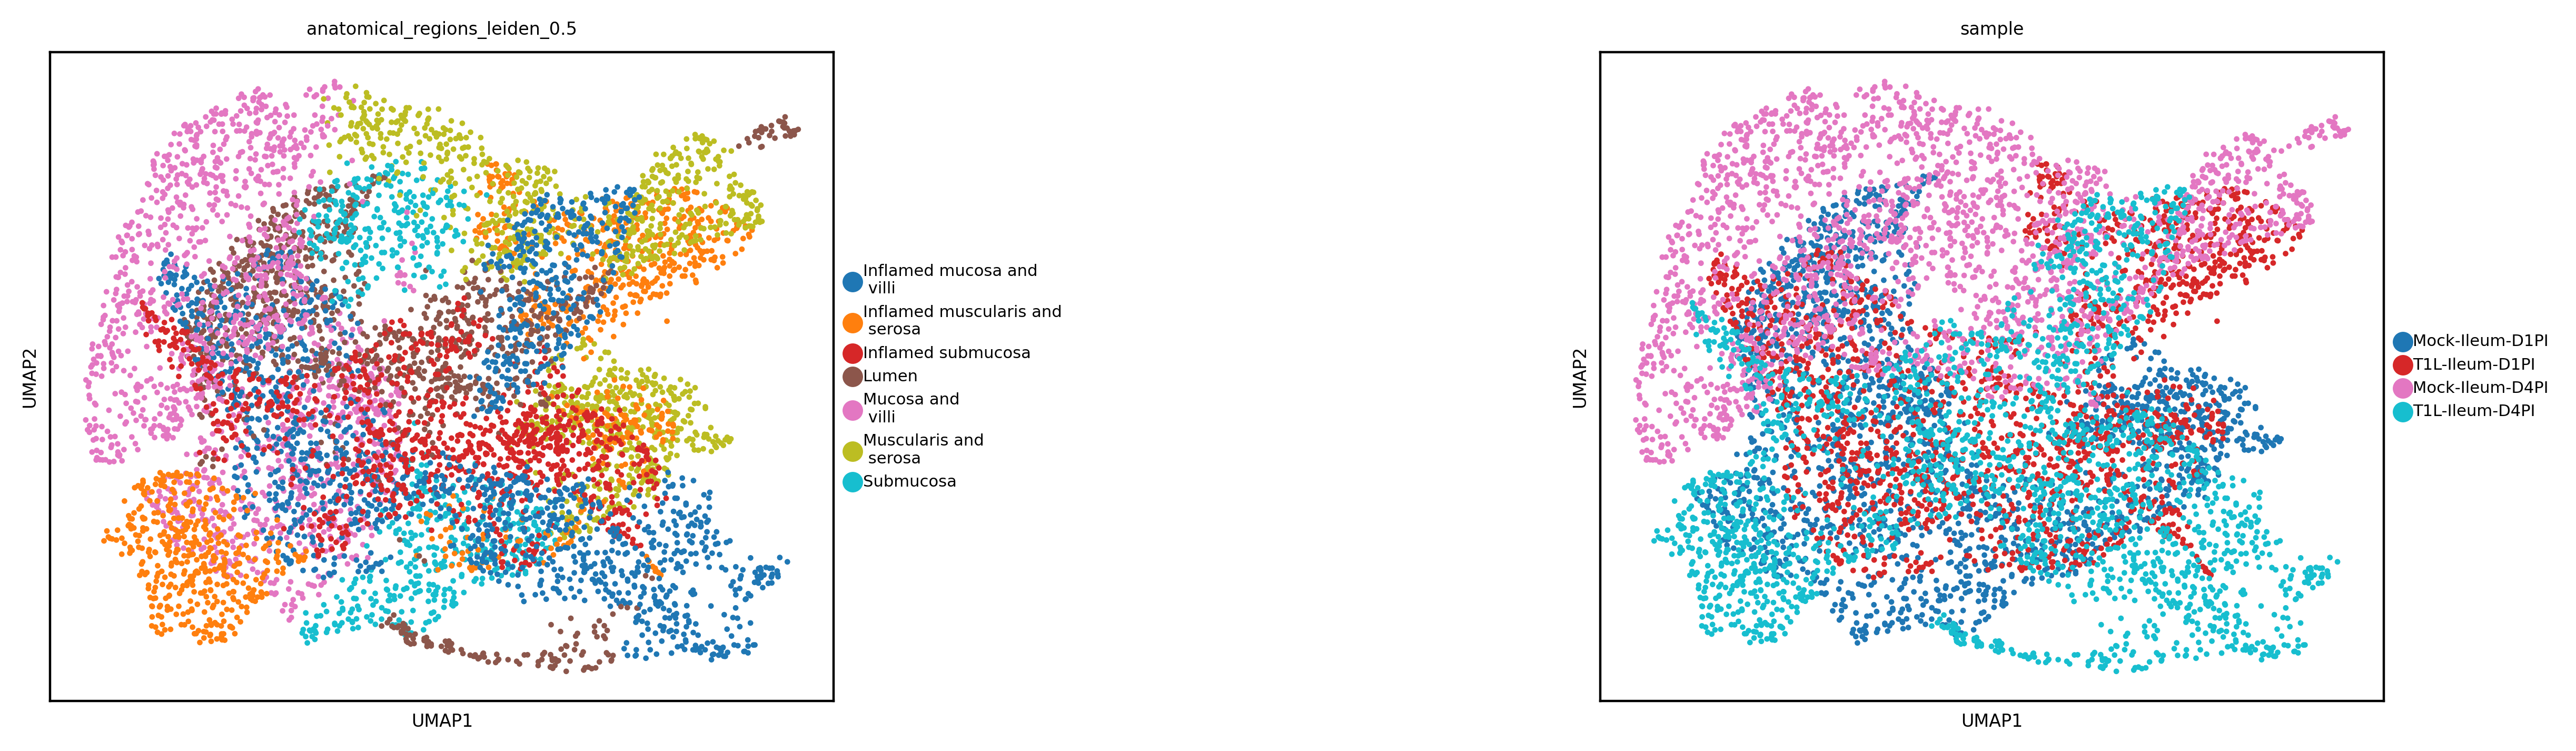

In [56]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ileum_infection_visium_no_viral_genes, color=["anatomical_regions_leiden_0.5", "sample"], wspace=0.8, palette="tab10")

In [57]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], ileum_infection_visium_no_viral_genes.uns["anatomical_regions_leiden_0.5_colors"])
)

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


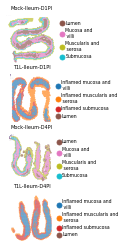

In [66]:
# sc.settings.set_figure_params(dpi=60, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), transparent=True, format="pdf")
fig, axs = plt.subplots(4, 1, figsize=(3,5))
for i, library in enumerate(samples):
    ad = ileum_infection_visium_no_viral_genes[ileum_infection_visium_no_viral_genes.obs["sample"] == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="anatomical_regions_leiden_0.5",
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs["anatomical_regions_leiden_0.5"].unique().tolist()
        ],
        size=1.5,
        scale_factor=0.6,
        show=False,
        ax=axs[i],
        frameon=False, 
        title=library
    )
# for i in range(3):
# axs[i].get_legend().set_visible(False)
# plt.tight_layout()
plt.savefig("figures/ileum_spatial_maps.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [59]:
# ileum_infection_visium_no_viral_genes.write_h5ad('./../pyobjs/ileum_infection_visium_no_viral_genes.h5ad')

In [3]:
ileum_infection_visium_no_viral_genes = sc.read_h5ad('./../pyobjs/ileum_infection_visium_no_viral_genes.h5ad')

In [11]:
day1_WT_infection_markers_significant = pd.read_csv("./ileum_IFN_genelist_D1PI.csv", index_col=0)
day1_WT_infection_markers_significant = day1_WT_infection_markers_significant[day1_WT_infection_markers_significant["logfoldchanges"] > 1.0]
day1_WT_infection_markers_significant = day1_WT_infection_markers_significant[day1_WT_infection_markers_significant["pvals_adj"] < 0.01]
day1_WT_infection_markers_significant = day1_WT_infection_markers_significant.sort_values(by= "scores", ascending=False)
print(day1_WT_infection_markers_significant)

        names     scores  logfoldchanges          pvals      pvals_adj
1       Isg15  39.504635        4.914759   0.000000e+00   0.000000e+00
2        Bst2  38.091705        3.520500   0.000000e+00   0.000000e+00
3         B2m  35.982697        1.996466  1.560063e-283  7.433702e-280
4       Ifit3  31.174690        5.819851  2.347955e-213  8.950406e-210
5        Irf7  30.486860        3.807481  3.891747e-204  1.236278e-200
..        ...        ...             ...            ...            ...
828    Rab3ip   3.302477        1.308228   9.583487e-04   8.257742e-03
830  B4galnt1   3.299157        2.014594   9.697551e-04   8.325916e-03
831   Gm47242   3.295209        6.060138   9.834849e-04   8.432398e-03
838    H2-Eb1   3.259612        1.016864   1.115648e-03   9.434006e-03
839       Mbp   3.251768        1.462784   1.146895e-03   9.689637e-03

[438 rows x 5 columns]


In [14]:
sc.tl.score_genes(ileum_infection_visium_no_viral_genes, day1_WT_infection_markers_significant["names"], use_raw=True, score_name = 'Infection_response_score')

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


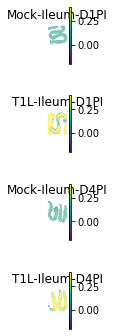

In [15]:
samples = ['Mock-Ileum-D1PI', 'T1L-Ileum-D1PI', 'Mock-Ileum-D4PI', 'T1L-Ileum-D4PI']
fig, axs = plt.subplots(4, 1, figsize=(1.0,5))
for i, library in enumerate(samples):
    ad = ileum_infection_visium_no_viral_genes[ileum_infection_visium_no_viral_genes.obs["sample"] == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=samples[i],
        color="Infection_response_score",
        size=1.5,
        scale_factor=1.0,
        show=False,
        ax=axs[i],
        frameon=False, clim=(-0.20, 0.40), title=samples[i]
    )
plt.tight_layout()
plt.show()

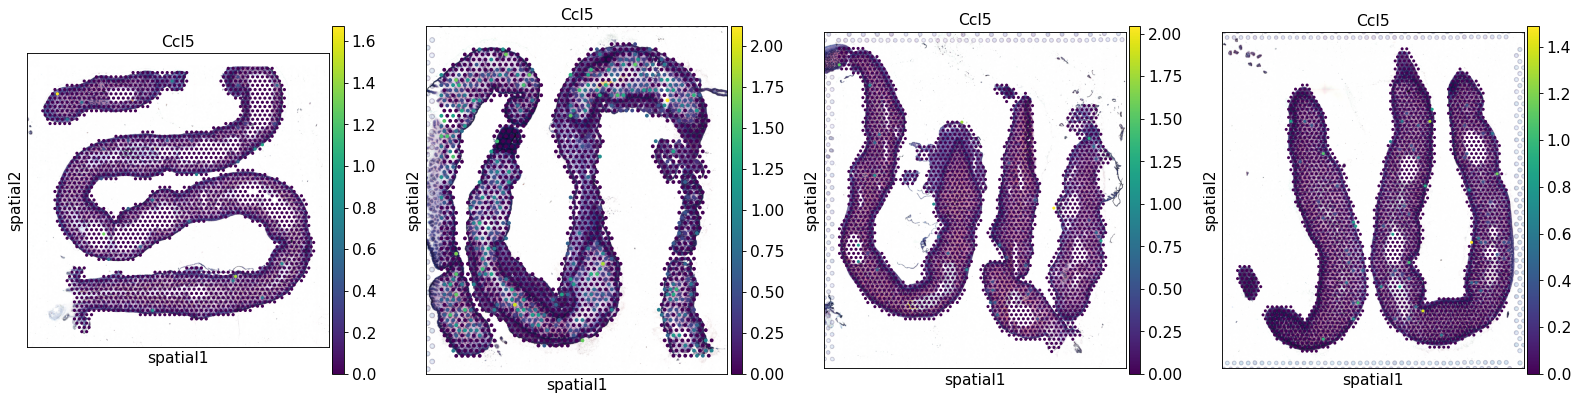

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, library in enumerate(samples):
    ad = ileum_infection_visium_no_viral_genes[ileum_infection_visium_no_viral_genes.obs["sample"] == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="Ccl5",
        size=1.0,
        legend_loc=None,
        show=False,
        ax=axs[i],
    )
plt.tight_layout()